# BIVARIATE ANALYSIS

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


In [16]:
import pandas as pd
import numpy as np

# '%matplotlib inline' to display histograms and the barplots to display inline with jupyter notebook 
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn for scatterplot and the striplot 
import seaborn as sbn

In [17]:
df = pd.read_csv("chennai_house_price_prediction.csv")
df.columns
#size of the dataset 'rows: 7109' ans 'columns: 19'

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

## Hypothesis -
 - Sales price should increase with increase in interior square feet
 - The sales price would depend on the area where house is located
 - Higher the number of rooms, bathrooms in the house, more should be the price 

  
## 1. House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
   - BUILDTYPE – The type of building

**1. Interior area and sales price (target)**

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

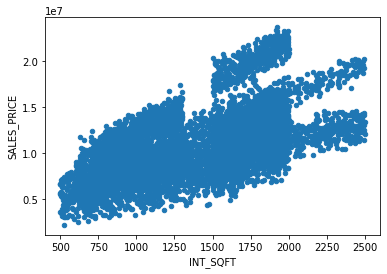

In [18]:
# interior area and sales price (target)

df.plot.scatter('INT_SQFT','SALES_PRICE')

- A very clear linear relationship can be seen between the interior area and sales price
- These variables have a positive correlation

In [19]:
# fig, ax = plt.subplots()
# colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
# ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: colors[x]))
# plt.show()

In [20]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

** 2. Sales Price against no of bedroom and bathroom**

In [21]:
# sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168580.0,NaN
2.0,12129780.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


**3. QS_OVERALL and sales price **

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

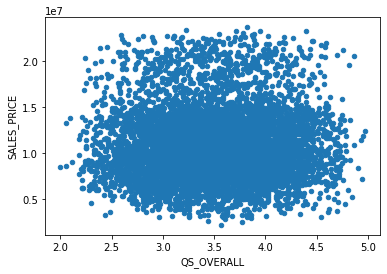

In [22]:
#QS_OVERALL and sales price

df.plot.scatter('QS_OVERALL', 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

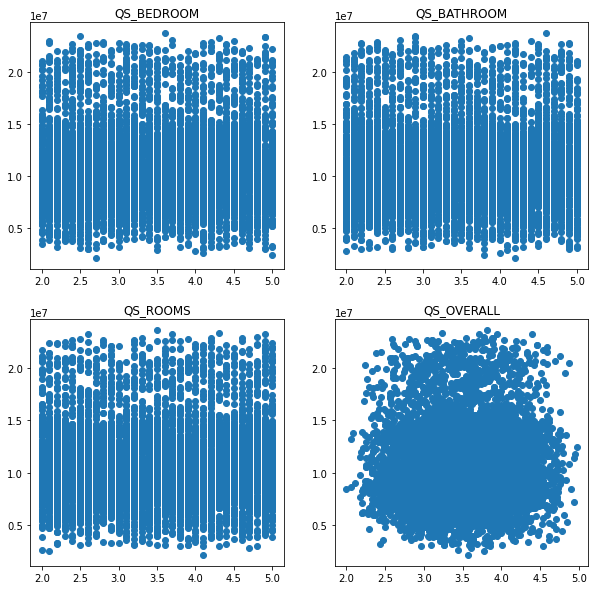

In [23]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')



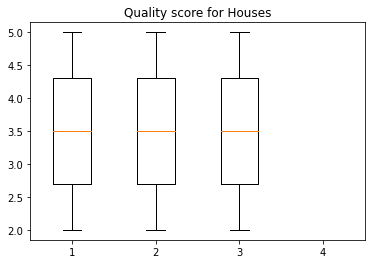

In [24]:
# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])


- Distribution of number of houses in each quartile is same for 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'
- For QS_OVERALL, 50 % of values lie in a very small range of ~3.2 to 3.7 score

** 4. Building type and sales price**

In [25]:
# SALE PRICE based on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Comercial      9982225
Commercial    13360440
House          8985370
Other          8104760
Others         9643160
Name: SALES_PRICE, dtype: int64

- Houses built for commercial purposes have a considerably higher sale price
- Houses with additional facility should have higher price

<AxesSubplot:ylabel='Frequency'>

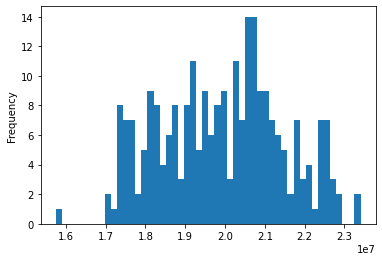

In [26]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

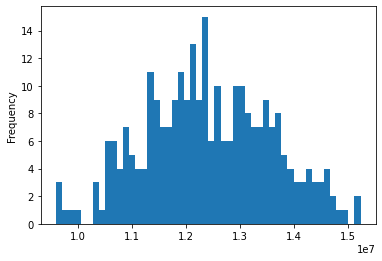

In [27]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
   - STREET
   - MZZONE  

**5. Building type and parking facility**

In [28]:
# building type and parking facility

df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Comercial   No            12617700.0
            Yes            7346750.0
Commercial  No            12695370.0
            Yes           13926030.0
House       No             8516800.0
            Noo            6468090.0
            Yes            9468150.0
Other       No             7138467.5
            Yes           10148412.5
Others      No             9144840.0
            Noo            8535580.0
            Yes           10039405.0
Name: SALES_PRICE, dtype: float64

- For all three categories, houses with park facility have a higher price
- we can use groupby function to generate a plot for better comparison

<AxesSubplot:xlabel='BUILDTYPE,PARK_FACIL'>

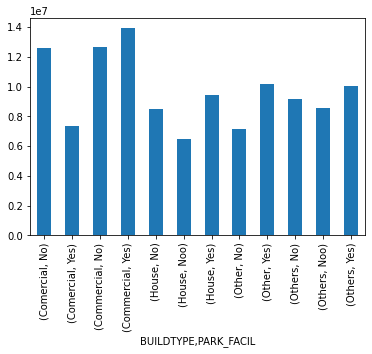

In [29]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

**6. Area-wise price for houses**

In [30]:
# average price for each area category

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8871195
Adyr,9044045
Ana Nagar,20020970
Ann Nagar,13488705
Anna Nagar,13714220
Chormpet,9593035
Chrmpet,8276185
Chrompet,9607900
Chrompt,9668900


- Anna Nagar and T Nagar are comparatively more expensive
- The least priced are among the 7 is karapakkam

<AxesSubplot:ylabel='Frequency'>

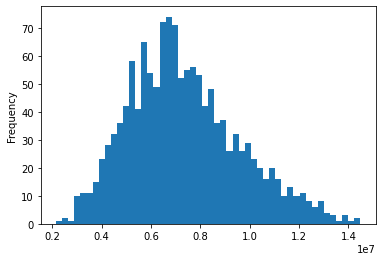

In [31]:
temp_df = df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

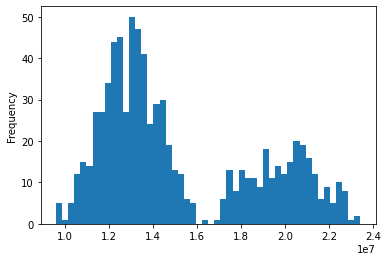

In [32]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

**7. Distance from main road **

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

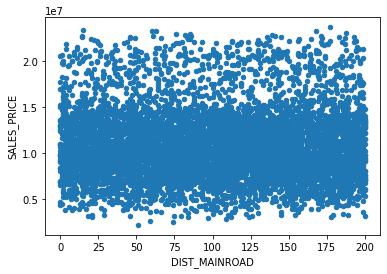

In [33]:
df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')

**8. Type of street around the house**

In [34]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9418295
NoAccess      8372750
Pavd         10947560
Paved        10468415
Name: SALES_PRICE, dtype: int64

- Both gravel and paved roads have approximately same sale price
- Houses marked with 'no access' have a lower sale price

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


<AxesSubplot:xlabel='SALES_PRICE', ylabel='COMMIS'>

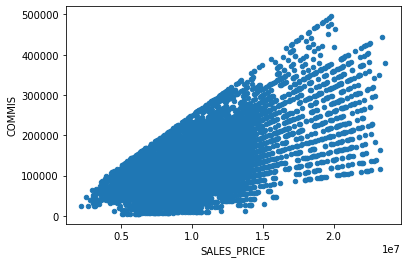

In [35]:
# commission and sales price

df.plot.scatter('SALES_PRICE', 'COMMIS')

In [36]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


In [37]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64